# Convex Optimization

Convex optimization is study of optimizing convex functions or convex sets. 

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

## 1. Functions

In this post, we will use 3 benchmark functions **BohachevskyN1**, **McCormick**, **Booth**

A Generic function to **plot** any input function defined below

In [2]:
def start_figure():
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.view_init(65, 60)
    return ax
    
def end_figure(ax):
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x,y)')
    plt.show()
  
def plot_function(func_class, ax):
    func = lambda x, y : func_class.value([x, y])
    subdivisions = 40
    min_arg, max_arg = func_class.ranges()
    X = np.linspace(min_arg[0], max_arg[0], subdivisions)
    Y = np.linspace(min_arg[1], max_arg[1], subdivisions)
    X, Y = np.meshgrid(X, Y)
    Z = func(X, Y)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='winter', alpha=0.5)
    ax.contour(X, Y, Z, 20, colors='black')
    plt.title(func_class.__name__)

### BohachevskyN1

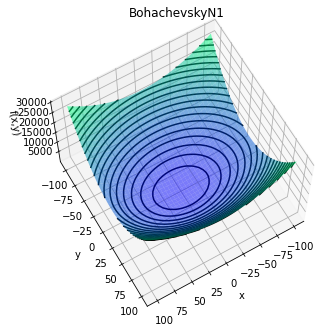

In [3]:
class BohachevskyN1:
    def guess():
        return np.array([-50.,-50.])

    def value(X):
        result = X[0]**2 + 2*X[1]**2
        result -= 0.3*np.cos(3*np.pi*X[0])
        result -= 0.4*np.cos(4*np.pi*X[1])
        result += 0.7
        return result

    def gradient(X):
        dfdx = 2.*X[0] + (0.3*3.*np.pi*np.sin(3*np.pi*X[0]))
        dfdy = 4.*X[1] + (0.4*4.*np.pi*np.sin(4*np.pi*X[1]))
        return np.array([dfdx, dfdy])

    def inv_hessian(X):
        dfdxx = 2.+((3.*np.pi)**2)*0.3*np.cos(3*np.pi*X[0])
        dfdyy = 4.+((4.*np.pi)**2)*0.4*np.cos(4*np.pi*X[1])
        dfdxy = 0
        hessian = np.zeros((2,2))
        hessian[0][0] = dfdxx
        hessian[1][1] = dfdyy
        hessian[0][1] = dfdxy
        hessian[1][0] = dfdxy
        return np.linalg.inv(hessian)

    def ranges():
        return (-100, -100), (100, 100)

ax = start_figure()
plot_function(BohachevskyN1, ax)
end_figure(ax)

### McCormick

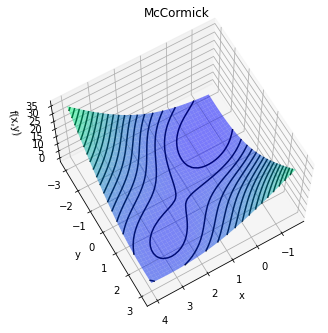

In [4]:
class McCormick:
    def guess():
        return np.array([4.0,-2.0])

    def value(X):
        result = np.sin(X[0]+X[1])
        result += (X[0]-X[1])**2.0
        result += -1.5*X[0] + 2.5*X[1] + 1.0
        return result

    def gradient(X):
        dfdx = np.cos(X[0]+X[1]) + 2*(X[0]-X[1]) - 1.5
        dfdy = np.cos(X[0]+X[1]) - 2*(X[0]-X[1]) + 2.5
        return np.array([dfdx, dfdy])

    def inv_hessian(X):
        dfdxx = -1.*np.sin(X[0]+X[1]) + 2
        dfdyy = -1.*np.sin(X[0]+X[1]) + 2
        dfdxy = -1.*np.sin(X[0]+X[1]) - 2
        hessian = np.zeros((2,2))
        hessian[0][0] = dfdxx
        hessian[1][1] = dfdyy
        hessian[0][1] = dfdxy
        hessian[1][0] = dfdxy
        return np.linalg.inv(hessian)

    def ranges():
        return (-1.5, -3.), (4., 3.)

ax = start_figure()
plot_function(McCormick, ax)
end_figure(ax)

### Booth

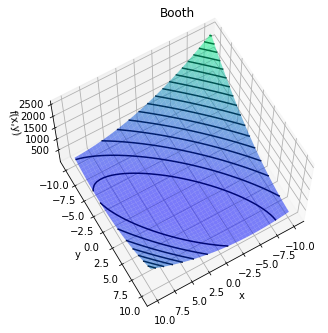

In [5]:
class Booth:
    def guess():
        return np.array([-10.0,-10.0])

    def value(X):
        a = X[0] + 2*X[1] - 7
        b = 2*X[0] + X[1] - 5
        result = a**2 + b**2
        return result

    def gradient(X):
        dfdx = 10*X[0] + 8*X[1] - 34
        dfdy = 8*X[0] + 10*X[1] - 38
        return np.array([dfdx, dfdy])

    def inv_hessian(X):
        dfdxx = 10.
        dfdyy = 10.
        dfdxy = 8.
        hessian = np.zeros((2,2))
        hessian[0][0] = dfdxx
        hessian[1][1] = dfdyy
        hessian[0][1] = dfdxy
        hessian[1][0] = dfdxy
        return np.linalg.inv(hessian)

    def ranges():
        return (-10, -10), (10, 10)

ax = start_figure()
plot_function(Booth, ax)
end_figure(ax)

## 3. Line Search

In [6]:
# TODO - move into a class ! 
def line_search_scale(function, guess, gradient, search_dir):
    return SCALE_STEP

BACKTRACKING_MAX_STEP_SIZE = 1.0
BACKTRACING_CONTROL = 0.5
BACKTRACKING_SHRINK_FACTOR = 0.5
BACKTRACKING_MAX_ITERATION = 10

def line_search_backtracking(function, guess, gradient, search_dir):
    m = np.dot(gradient, search_dir)
    t = -BACKTRACING_CONTROL * m

    value = function.value(guess)
    terminate = False
    j = 0
    step_size = BACKTRACKING_MAX_STEP_SIZE
    while not terminate:
        # stopping criteria
        if j >= BACKTRACKING_MAX_ITERATION:
            terminate = True

        test = value - function.value(guess+search_dir*step_size)
        if test >= step_size*t:
            terminate = True

        step_size *= BACKTRACKING_SHRINK_FACTOR
        j += 1

    return step_size

## 2. Optimizers

In [7]:
# Line search
LINE_SEARCH_ALGO = line_search_backtracking

# Termination condition
MAX_ITERATIONS = 200
THRESHOLD = 1e-07

Lets implement a plot function to visualize the optimizer steps

In [8]:
def plot_optimiser(function, optimiser):
    results = np.asarray(optimiser(function))
    X, Y = results[:,0],results[:,1]
    Z = function.value(np.asarray([X,Y]))
    color = np.linspace([1,0,0], [0,1,0], num=len(results))
    ax.scatter3D(X, Y, Z, c=color, alpha=1.0, s=3)

### Gradient Descent

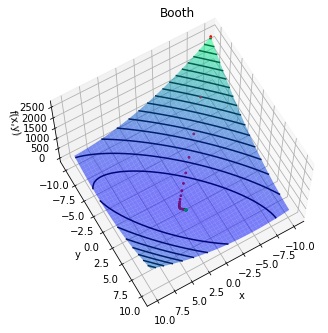

In [9]:
def GradientDescent(function):
    results = []
    guess = function.guess()
    results.append(np.copy(guess))

    terminate = False
    num_iterations = 0

    while not terminate:
        gradient = function.gradient(guess)

        step = -gradient
        step *= LINE_SEARCH_ALGO(function, guess, gradient, step)

        guess += step
        results.append(np.copy(guess))

        # test termination conditions
        num_iterations += 1
        if np.linalg.norm(gradient) < THRESHOLD or num_iterations > MAX_ITERATIONS:
            terminate = True

    return results

ax = start_figure()
plot_function(Booth, ax)
plot_optimiser(Booth, GradientDescent)
end_figure(ax)

### Quasi Newton Raphson (BFGS)

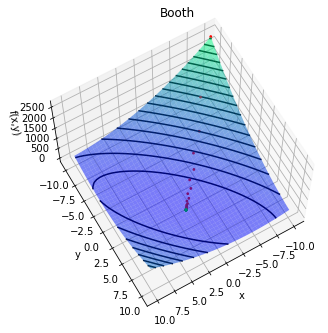

In [10]:
def QuasiNewtonRaphson_BFGS(function):
    results = []
    guess = function.guess()
    results.append(np.copy(guess))

    terminate = False
    num_iterations = 0
    H = np.identity(2) # approximate inverse hessian
    y = np.zeros(2) # gradient@x+1 - gradient@x

    while not terminate:
        gradient = function.gradient(guess)

        step = -H.dot(gradient)
        step *= LINE_SEARCH_ALGO(function, guess, gradient, step)

        guess += step
        results.append(np.copy(guess))

        # update the inverse hessian matrix
        next_gradient = function.gradient(guess)
        y = next_gradient - gradient
        ys = np.inner(y, step) # scalar

        # early version
        #next_H = (I - np.outer(step, y) / ys)
        #next_H *= H
        #next_H *= (I - np.outer(y, step) / ys)
        #next_H += (np.outer(step, step) / ys)

        #optimized version
        Hy = np.dot(H, y) # vector
        yHy = np.inner(y, Hy) # scalar
        next_H = H
        next_H += ((ys+yHy) * np.outer(step, step) / ys ** 2)
        next_H -= (np.outer(Hy, step) + np.outer(step, Hy)) / ys

        H = next_H

        # test termination conditions
        num_iterations += 1
        if np.linalg.norm(gradient) < THRESHOLD or num_iterations > MAX_ITERATIONS:
            terminate = True

    return results

ax = start_figure()
plot_function(Booth, ax)
plot_optimiser(Booth, QuasiNewtonRaphson_BFGS)
end_figure(ax)

### NewtonRaphson

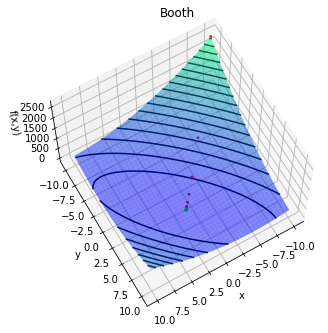

In [11]:
def NewtonRaphson(function):
    results = []
    guess = function.guess()
    results.append(np.copy(guess))

    terminate = False
    num_iterations = 0

    while not terminate:
        gradient = function.gradient(guess)

        step = -function.inv_hessian(guess).dot(gradient)
        step *= LINE_SEARCH_ALGO(function, guess, gradient, step)

        guess += step
        results.append(np.copy(guess))

        # test termination conditions
        num_iterations += 1
        if np.linalg.norm(gradient) < THRESHOLD or num_iterations > MAX_ITERATIONS:
            terminate = True

    return results

ax = start_figure()
plot_function(Booth, ax)
plot_optimiser(Booth, NewtonRaphson)
end_figure(ax)

## References

- Boyd, Stephen, and Lieven Vandenberghe. Convex optimization. Cambridge university press, 2004